In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [2]:
import numpy as np
import matplotlib
#matplotlib.use('AGG')
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import sys, getopt
import os,time
%matplotlib inline

In [3]:
import os
os.makedirs('test',exist_ok = True)

In [4]:
#imax

In [5]:
def readData(datadir):
    #datadir + 'TracerX.csv'
    X = pd.read_csv(datadir + 'TracerX.csv')
    Y = pd.read_csv(datadir + 'TracerY.csv')
    Ey = pd.read_csv(datadir + 'TracerEy.csv')
    Ek = pd.read_csv(datadir + 'TracerEk.csv')
    #data = pd.read_csv('TracerEy.csv')

    return X,Y,Ey,Ek



In [6]:
def trackParticle(value='ek',time = [0,110],**kwargs):
    cmap=plt.get_cmap('rainbow')
    fig, axs = plt.subplots(1, 1)
    #time=150
    #for key,value in kwargs:
    
    try:
        X = kwargs['X']
        Y = kwargs['Y']
        Ey = kwargs['Ey']
        Ek = kwargs['Ek']
        xlim = kwargs['xlim']
        ylim = kwargs['ylim']
        
    except:
        print('wrong read Dict')
        pass
    
    imax=Y.shape[1]
    tt = np.asarray(Y.iloc[:,0])
    #print(kwargs)
    #locals().update(kwargs)
    #print(X)
    for num in range(10,imax,int(imax/25)):
        # if (py[1228,num]>0):
        #   print(num)
        x = X.iloc[time[0]:time[1],num]#- Y.iloc[0,num]
        y = Y.iloc[time[0]:time[1],num]#Ey.iloc[0:110,num]
        x = np.asarray(x)
        y = np.asarray(y)
        ek =  Ek.iloc[time[0]:time[1],num]
        ek = np.asarray(ek)
        T = tt[time[0]:time[1]]
        dydx = eval(value)#t#(0.5 * (t[:-1] + t[1:]))
        #lines = [zip(x, y)]
        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)

        #print(points)
        # Create a continuous norm to map from data points to colors
        norm = plt.Normalize(dydx.min(), dydx.max())
        lc = LineCollection(segments, cmap='jet')#, norm=norm)
        #lc = LineCollection(lines, cmap='rainbow', norm=norm)
        # Set the values used for colormapping
        lc.set_array(dydx)
        lc.set_linewidth(1)
        line = axs.add_collection(lc)
        axs.set_xlabel('x')
        axs.set_ylabel('y')
        

    axs.set_xlim(xlim)
    axs.set_ylim(ylim)

    cbar = fig.colorbar(line, ax=axs)
    #plt.savefig(Img_dir+'track_e'+'%04d'%num+'.png')
    cbar.set_label(value)
    #plt.close('all')
    plt.savefig(savedir + str(value)+str(time[0])+'_'+str(time[1])+'.jpg',dpi=160)
    plt.clf()
    plt.close('all')
    





In [7]:
def main(datadir,xlim,ylim):
    X,Y,Ey,Ek = readData(datadir) #[X,Y,Ey,Ek]
    try:
        PropertyDict = {'X':X,'Y':Y,'Ey':Ey,'Ek':Ek,'xlim':xlim,'ylim':ylim}
    except:
        PropertyDict = {'X':X,'Y':Y,'Ey':Ey,'Ek':Ek}
    #print(PropertyDict)
    global imax
    global savedir
    savedir = datadir
    trackParticle('ek',[0,110],**PropertyDict)
    trackParticle('ek',[110,150],**PropertyDict)
    trackParticle('T',[0,110],**PropertyDict)
    trackParticle('T',[110,150],**PropertyDict)
    return
    #plt.show()

In [8]:
def Particle(datadir):
    os.makedirs(datadir + 'test',exist_ok = True)
    X,Y,Ey,Ek = readData(datadir)

    global imax
    imax=Y.shape[1]
    tt = np.asarray(Y.iloc[:,0])
    for i in range(10,imax,10):
        #i=
        plt.plot(Ey.iloc[:,i])
        plt.plot(np.asarray(Y.iloc[:,i])*1e16)
        plt.plot(np.asarray(Ek.iloc[:,i])*5e10)
        plt.ylim([-2e11,2e11])
        plt.savefig(datadir + 'test/'+str(i)+'.jpg')
        plt.clf()
        plt.close('all')
    return

In [9]:
DataDir = ['y20x250/','y120x250/','y30x250/','y50x250/','y10x250/']

Xlim = [[0,350e-6],[0,350e-6],[0,350e-6],[0,350e-6],[0,350e-6]]
Ylim = [[-30e-6,30e-6],[-140e-6,140e-6],[-50e-6,50e-6],[-80e-6,80e-6],[-20e-6,20e-6]]

In [10]:

for i,xlim,ylim in zip(DataDir,Xlim,Ylim):
    main(i,xlim,ylim)


ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok


In [11]:
for i in DataDir:
    Particle(i)

In [ ]:
datadir = 'y20x250/
xlim=[0,400e-6]
ylim=[-30e-6,30e-6]

main(datadir)

In [ ]:
datadir = 'y20x250/
Particle(datadir)

In [15]:
trackParticle()

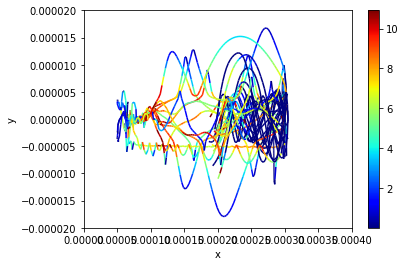

In [12]:
cmap=plt.get_cmap('rainbow')
fig, axs = plt.subplots(1, 1)
time=150
for num in range(10,int(imax/10),5):
# if (py[1228,num]>0):
#   print(num)
    x = X.iloc[0:time,num]#- Y.iloc[0,num]
    y = Y.iloc[0:time,num]#Ey.iloc[0:110,num]
    x = np.asarray(x)
    y = np.asarray(y)
    ek =  Ek.iloc[0:110,num]
    ek = np.asarray(ek)
    t = tt[0:time]
    dydx = ek#t#(0.5 * (t[:-1] + t[1:]))
    #lines = [zip(x, y)]
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    #print(points)
    # Create a continuous norm to map from data points to colors
    norm = plt.Normalize(dydx.min(), dydx.max())
    lc = LineCollection(segments, cmap='jet')#, norm=norm)
    #lc = LineCollection(lines, cmap='rainbow', norm=norm)
    # Set the values used for colormapping
    lc.set_array(dydx)
    #lc.set_linewidth(5)
    line = axs.add_collection(lc)
    axs.set_xlabel('x')
    axs.set_ylabel('y')

axs.set_xlim(0,400e-6)
axs.set_ylim(-20e-6,20e-6 )
    
fig.colorbar(line, ax=axs)
#plt.savefig(Img_dir+'track_e'+'%04d'%num+'.png')

#plt.close('all')

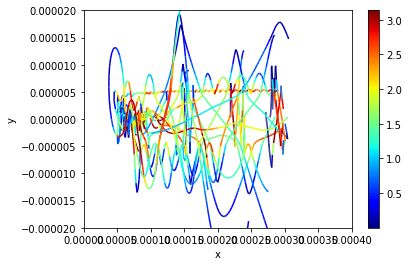

In [25]:
cmap=plt.get_cmap('rainbow')
fig, axs = plt.subplots(1, 1)
time=110
for num in range(10,int(imax),50):
# if (py[1228,num]>0):
#   print(num)
    x = X.iloc[0:time,num]#- Y.iloc[0,num]
    y = Y.iloc[0:time,num]#Ey.iloc[0:110,num]
    x = np.asarray(x)
    y = np.asarray(y)
    ek =  Ek.iloc[0:110,num]
    ek = np.asarray(ek)
    t = tt[0:time]
    dydx = ek #t#(0.5 * (t[:-1] + t[1:]))
    #lines = [zip(x, y)]
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    #print(points)
    # Create a continuous norm to map from data points to colors
    norm = plt.Normalize(dydx.min(), dydx.max())
    lc = LineCollection(segments, cmap='jet')#, norm=norm)
    #lc = LineCollection(lines, cmap='rainbow', norm=norm)
    # Set the values used for colormapping
    lc.set_array(dydx)
    #lc.set_linewidth(5)
    line = axs.add_collection(lc)
    axs.set_xlabel('x')
    axs.set_ylabel('y')

axs.set_xlim(0,400e-6)
axs.set_ylim(-20e-6,20e-6 )
    
fig.colorbar(line, ax=axs)
#plt.savefig(Img_dir+'track_e'+'%04d'%num+'.png')

#plt.close('all')

In [122]:
imax

1046

(0.00015, 0.00035)

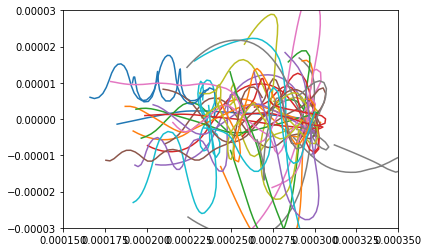

In [45]:

t=110
for i in range(1,imax,int(imax/40)):
    plt.plot(X.iloc[t:,i],Y.iloc[t:,i])
    
plt.ylim([-30e-6,30e-6])
plt.xlim([150e-6,350e-6])

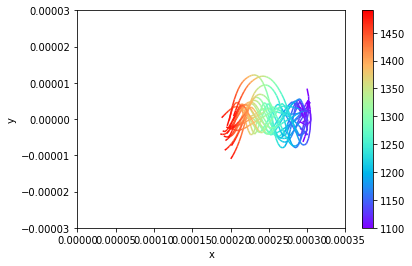

In [134]:
cmap=plt.get_cmap('rainbow')
fig, axs = plt.subplots(1, 1)
time=110
for num in range(10,int(imax/10),5):
# if (py[1228,num]>0):
#   print(num)
    x = X.iloc[time:,num]#- Y.iloc[0,num]
    y = Y.iloc[time:,num]#Ey.iloc[0:110,num]
    x = np.asarray(x)
    y = np.asarray(y)
    t = tt[time:]
    dydx = t#(0.5 * (t[:-1] + t[1:]))
    #lines = [zip(x, y)]
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    #print(points)
    # Create a continuous norm to map from data points to colors
    norm = plt.Normalize(dydx.min(), dydx.max())
    lc = LineCollection(segments, cmap='rainbow')#, norm=norm)
    #lc = LineCollection(lines, cmap='rainbow', norm=norm)
    # Set the values used for colormapping
    lc.set_array(dydx)
    #lc.set_linewidth(5)
    line = axs.add_collection(lc)
    axs.set_xlabel('x')
    axs.set_ylabel('y')

axs.set_xlim(0,350e-6)
axs.set_ylim(-30e-6,30e-6 )
    
fig.colorbar(line, ax=axs)
#plt.savefig(Img_dir+'track_e'+'%04d'%num+'.png')

#plt.close('all')

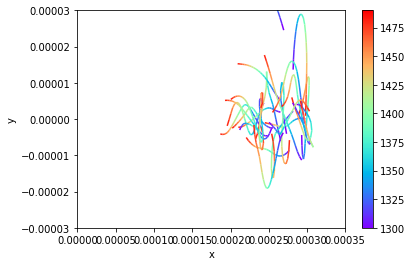

In [100]:
cmap=plt.get_cmap('rainbow')
fig, axs = plt.subplots(1, 1)
time=130
for num in range(10,imax,40):
# if (py[1228,num]>0):
#   print(num)
    x = X.iloc[time:,num]#- Y.iloc[0,num]
    y = Y.iloc[time:,num]#Ey.iloc[0:110,num]
    x = np.asarray(x)
    y = np.asarray(y)
    t = tt[time:]
    dydx = t#(0.5 * (t[:-1] + t[1:]))
    #lines = [zip(x, y)]
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    #print(points)
    # Create a continuous norm to map from data points to colors
    norm = plt.Normalize(dydx.min(), dydx.max())
    lc = LineCollection(segments, cmap='rainbow')#, norm=norm)
    #lc = LineCollection(lines, cmap='rainbow', norm=norm)
    # Set the values used for colormapping
    lc.set_array(dydx)
    #lc.set_linewidth(5)
    line = axs.add_collection(lc)
    axs.set_xlabel('x')
    axs.set_ylabel('y')

axs.set_xlim(0,350e-6)
axs.set_ylim(-30e-6,30e-6 )
    
fig.colorbar(line, ax=axs)
#plt.savefig(Img_dir+'track_e'+'%04d'%num+'.png')

#plt.close('all')

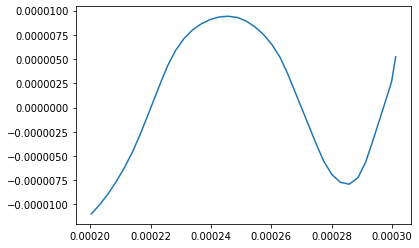

In [6]:
i=80
t=110
plt.plot(X.iloc[t:,i],Y.iloc[t:,i])

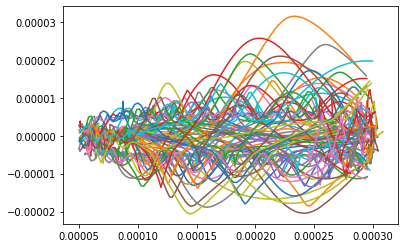

In [47]:
t=110
for i in range(1,200,2):
    plt.plot(X.iloc[:t,i],Y.iloc[:t,i])

(3e-05, 0.00035)

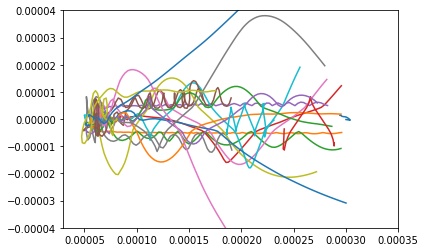

In [40]:
t=110
for i in range(1,imax,int(imax/20)):
    plt.plot(X.iloc[:t,i],Y.iloc[:t,i])
    
plt.ylim([-40e-6,40e-6])
plt.xlim([30e-6,350e-6])